In [1]:
import tensorflow as tf
import os
import numpy as np
from numpy.linalg import inv
import warnings
import sys
from scipy import io as sio
import matplotlib
import matplotlib.pyplot as plt
#%warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
class HSI:
    def __init__(self, data, rows, cols, gt,s_gt):
        if data.shape[0] < data.shape[1]:
            data = data.transpose()

        self.bands = np.min(data.shape)
        self.cols = cols
        self.rows = rows
        self.image = np.reshape(data,(self.rows,self.cols,self.bands))
        self.gt = gt
        self.s_gt = s_gt

    def array(self):
        return np.reshape(self.image,(self.rows*self.cols,self.bands))

    def get_bands(self, bands):
        return self.image[:,:,bands]

    def crop_image(self,start_x,start_y,delta_x=None,delta_y=None):
        if delta_x is None: delta_x = self.cols - start_x
        if delta_y is None: delta_y = self.rows - start_y
        self.cols = delta_x
        self.rows = delta_y
        self.image = self.image[start_x:delta_x+start_x,start_y:delta_y+start_y,:]
        return self.image

def load_HSI(path):
    try:
        data = sio.loadmat(path)
    except NotImplementedError:
        data = h5py.File(path, 'r')

    numpy_array = np.asarray(data['Y'], dtype=np.float32)
    numpy_array = numpy_array / np.max(numpy_array.flatten())
    n_rows = data['lines'].item()
    n_cols = data['cols'].item()

    if 'GT' in data.keys():
        gt = np.asarray(data['GT'], dtype=np.float32)
    else:
        gt = None
    if 'S_GT' in data.keys():
        s_gt = np.asarray(data['S_GT'], dtype=np.float32)
    else:
        s_gt = None
    return HSI(numpy_array, n_rows, n_cols, gt,s_gt)

In [3]:
# Load an HSI dataset
path_to_hsi = "/content/Urban4.mat"
hsi_data = load_HSI(path_to_hsi)

# Access the entire hyperspectral image data as a NumPy array
entire_data = hsi_data.array()


In [4]:
print(entire_data.shape)

(94249, 162)


In [5]:
import numpy as np
# Select the first 10000 rows
subset_data = entire_data[:10000, :]

print(subset_data.shape)


(10000, 162)


In [6]:
HSI = np.reshape(subset_data, (100,100,162))

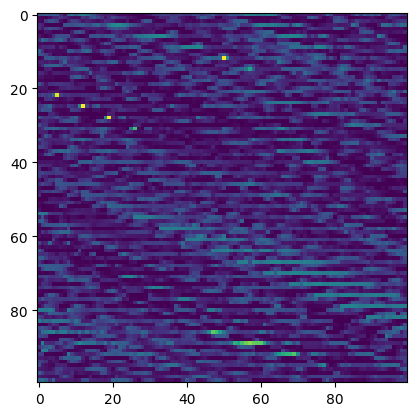

In [7]:
plt.imshow(HSI[:,:,159])

In [8]:
import cv2
import numpy as np

# Read the image file
image = cv2.imread('data_image.jpg')

OI = np.array(image)

print(OI.shape)


(100, 100, 3)


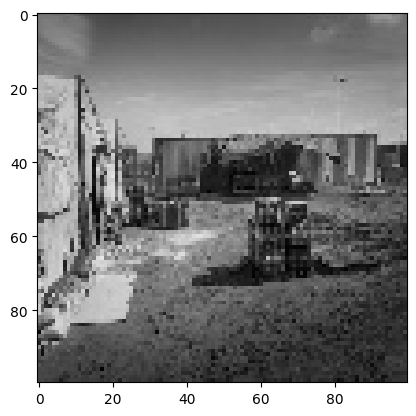

In [9]:
plt.imshow(OI[:,:,])

In [10]:
import cv2


OI = cv2.resize(OI, (100, 100))

# Display the shape of the resized image
print(OI.shape)


(100, 100, 3)


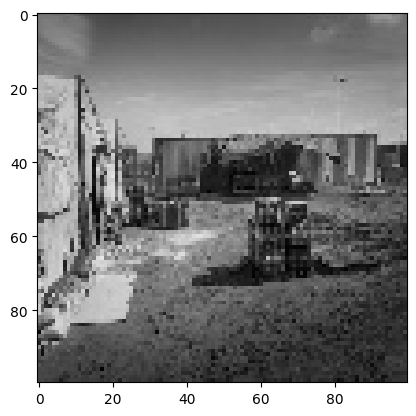

In [11]:
plt.imshow(OI[:,:,])

In [12]:
OI.shape

(100, 100, 3)

In [13]:
import numpy as np
from sklearn.decomposition import PCA

reshaped_data_2d = np.reshape(HSI, (-1, 162))

# Apply PCA to reduce to 10 components
pca = PCA(n_components=10)
pca_result = pca.fit_transform(reshaped_data_2d)

# Reshape the PCA result back to a 3D array
HSIP = np.reshape(pca_result, (100, 100, 10))

print(HSIP.shape)


(100, 100, 10)


In [14]:

HSIP *= 3/5



In [15]:

HSIF= np.zeros((100, 100, 10))

HSIF[:, :, :] = HSIP[:, :, :]



In [16]:
HSIP[:,:,0]

array([[ 0.26143044,  0.41704735,  0.46307322, ...,  0.09845132,
         0.42825645,  0.2897269 ],
       [-0.6024624 , -1.0560104 , -1.0932851 , ..., -0.41136822,
        -0.26874045, -0.11983429],
       [-0.27834487, -0.83619857, -0.12913385, ..., -0.15584281,
        -0.06025138, -0.17210904],
       ...,
       [ 0.8379858 ,  0.56911755, -0.09557597, ..., -0.40717807,
        -0.5285514 , -0.3742232 ],
       [-0.2678607 ,  0.09956345,  0.18307778, ...,  0.26794532,
         0.5748779 , -0.248396  ],
       [ 0.7727178 ,  1.0643923 ,  0.7191502 , ..., -0.17261575,
        -0.09870218, -0.03745214]], dtype=float32)

In [17]:
import numpy as np

OIG = np.dot(OI[...,:3], [0.2989, 0.5870, 0.1140])

# Display the shape of the grayscale image
print("Grayscale image shape:", OIG.shape)


Grayscale image shape: (100, 100)


In [19]:
import numpy as np



# Reshape the image into a 1D array
image_1d = OIG.flatten()

# Split the 1D array into 10 subarrays each containing 1000 pixels
subimages = np.array_split(image_1d, 10)

# Check the shape of each subimage
for idx, subimage in enumerate(subimages):
    print(f"Subimage {idx + 1} shape: {subimage.shape}")


Subimage 1 shape: (1000,)
Subimage 2 shape: (1000,)
Subimage 3 shape: (1000,)
Subimage 4 shape: (1000,)
Subimage 5 shape: (1000,)
Subimage 6 shape: (1000,)
Subimage 7 shape: (1000,)
Subimage 8 shape: (1000,)
Subimage 9 shape: (1000,)
Subimage 10 shape: (1000,)


In [ ]:
#Encryption with key 'x'
n_bands=10
x = (n_bands*1000)/np.average(OIG)


In [20]:
#STEGANOGRAPHY
import numpy as np



for i in range(n_bands):
    for j in range(100):
        for k in range(10):
            # Find the index of the minimum of the next 10 pixels in the current band of HSIP
            min_index = np.argmin(HSIP[j, k*10:(k+1)*10, i],axis=0)
            print(k*10+min_index)

            # Add the k-th pixel of the i-th subpart to the minimum pixel
            HSIP[j, k*10 + min_index, i] += subimages[i][k]
            HSIP[j, k*10 + min_index, i] += x


Streaming output truncated to the last 5000 lines.
9
12
28
31
49
54
67
75
85
93
6
12
25
35
43
50
66
76
89
95
5
17
24
30
44
56
63
71
83
97
0
19
22
38
43
56
61
78
85
93
6
19
29
30
41
50
60
77
83
94
2
12
25
30
46
59
63
70
86
90
6
19
29
34
48
51
62
79
87
92
5
13
27
31
47
57
65
79
86
94
2
19
29
36
45
50
65
77
85
97
3
12
26
39
43
58
69
78
86
99
0
12
20
38
43
55
64
72
86
93
1
11
23
36
43
57
66
72
83
99
9
10
29
33
45
50
62
72
85
99
1
19
20
34
46
52
62
71
86
93
5
10
23
34
49
50
63
77
89
90
3
17
28
37
40
56
60
72
88
99
9
10
28
31
41
53
60
71
83
99
0
16
24
33
41
58
63
70
88
97
9
19
24
35
46
50
63
72
82
98
7
16
21
35
48
51
60
70
86
99
0
10
23
33
49
57
65
70
89
92
3
16
29
31
48
53
60
70
86
96
5
14
23
38
45
50
67
73
84
93
8
14
23
30
40
56
64
76
81
96
3
11
23
37
48
55
62
78
81
92
3
11
20
30
46
50
61
79
81
97
0
12
20
30
44
53
63
79
83
90
0
19
20
30
45
57
69
77
84
91
0
18
28
35
43
54
65
71
82
92
8
16
28
37
44
50
60
78
85
96
6
14
26
36
46
59
64
70
87
92
5
18
25
39
45
50
66
72
89
98
7
10
29
37
44
51
64
7

In [21]:
HSIP[:,:,6]

array([[ 1.0581643e-02,  1.8022392e-02, -9.4032818e-03, ...,
         8.2357861e-03,  6.4695403e-03,  3.7976585e-02],
       [ 4.8669036e-02, -7.1012095e-04, -2.8585116e-03, ...,
        -4.9444032e-03,  8.6267469e-03,  1.2117770e-02],
       [ 3.4786962e-02,  2.1638012e-02, -7.6903575e-03, ...,
         1.8407578e-02,  1.8350158e-02,  1.0071219e-02],
       ...,
       [-1.9989429e-02, -1.7833916e-03,  5.6729715e-02, ...,
        -4.2492690e-04, -5.0973617e-03, -6.1223274e-03],
       [-1.3688471e-02,  3.2132512e-04,  2.6965942e-02, ...,
        -3.3977944e-02,  2.0164834e-02,  1.3958979e-02],
       [ 2.6611469e+02,  2.7746199e-02,  2.3259500e-02, ...,
         5.3249544e-04, -1.6506432e-02, -1.2633094e-02]], dtype=float32)

**DECRYPTION**

In [23]:
#Decrypting
import numpy as np

decrypt_matrix = np.zeros((100, 100, 10))

decrypt_matrix[:, :, :] = HSIP[:, :, :]

print(decrypt_matrix)



[[[ 2.61430442e-01 -5.02500772e-01 -1.46426916e-01 ... -5.18121896e-03
   -5.29122422e-04  2.18634261e-03]
  [ 4.17047352e-01 -5.06139100e-01 -1.76359683e-01 ... -8.02312605e-03
   -4.53792745e-03  7.35328905e-03]
  [ 4.63073224e-01 -5.12086332e-01 -1.92096457e-01 ... -6.53594313e-03
   -5.69149759e-03 -1.08268224e-02]
  ...
  [ 2.04234634e+02 -4.24696207e-01 -1.78490713e-01 ... -2.07209289e-02
    9.00242128e-04  8.53892136e-03]
  [ 4.28256452e-01  2.39014283e-01 -1.76217154e-01 ... -2.26867478e-02
   -1.26579180e-02  1.54566532e-02]
  [ 2.89726913e-01  3.64671141e-01  2.83896729e+02 ... -1.13915093e-03
   -4.58631478e-03 -5.46718889e-04]]

 [[-6.02462411e-01  3.51596661e-02 -6.51178882e-02 ...  2.25122803e+02
    4.72768908e-03  3.36085726e-03]
  [-1.05601037e+00 -3.59126776e-01  1.45429550e-02 ... -8.41942208e-04
   -5.01796464e-03 -2.96637765e-03]
  [ 2.07042496e+02  2.23641617e+02  9.28798765e-02 ...  2.85926461e-03
   -9.71307233e-03  2.32122131e+02]
  ...
  [-4.11368221e-01 -1.5

In [ ]:
print(np.max(HSIP))

298.97867


In [24]:

DIG= np.zeros((100, 100,))
DIG[:, :, ] = OIG[:, :,]



In [25]:
import numpy as np

image_1d = DIG.flatten()

DIG_subimages = np.array_split(image_1d, 10)

for idx, subimage in enumerate(DIG_subimages):
    print(f"DIG_Subimage {idx + 1} shape: {subimage.shape}")


DIG_Subimage 1 shape: (1000,)
DIG_Subimage 2 shape: (1000,)
DIG_Subimage 3 shape: (1000,)
DIG_Subimage 4 shape: (1000,)
DIG_Subimage 5 shape: (1000,)
DIG_Subimage 6 shape: (1000,)
DIG_Subimage 7 shape: (1000,)
DIG_Subimage 8 shape: (1000,)
DIG_Subimage 9 shape: (1000,)
DIG_Subimage 10 shape: (1000,)


In [26]:
import numpy as np

n_bands = 10
x = (n_bands*1000)/np.average(OIG)
for i in range(n_bands):
    for j in range(100):
        for k in range(10):
            max_index = np.argmax(decrypt_matrix[j, k*10:(k+1)*10, i],axis=0)
            decrypt_matrix[j, k*10 + max_index, i] -= HSIF[j, k*10 + max_index, i]
            decrypt_matrix[j, k*10 + max_index, i] -= x
            DIG_subimages[i][k] = decrypt_matrix[j, k*10 + max_index, i]



In [27]:

concatenated_image = np.concatenate(DIG_subimages)
print("Concatenated image shape:", concatenated_image.shape)


Concatenated image shape: (10000,)


In [28]:
gray_image = concatenated_image.reshape((100, 100))


In [31]:
gray_image.shape

(100, 100)

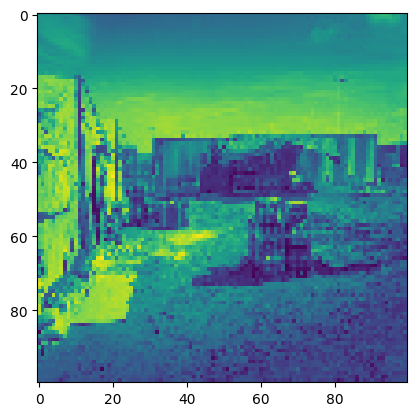

In [32]:
plt.imshow(gray_image)

So the main advantage of this technique is that it is not a regular cyber attack prevention technique but rather a data protection technique.First we would hide the data in an HSI mimicking that HSI is our original data.Even then if the intruder sense the data , he has to first find out the correct intensities of pixels as we have toyed with pixel intensities.Then he has to find out the location of each data pixel which is stored at various segments of HSI and have to concatenate them in order.Even if he knows the location , to access data values correctly he needs to know encrypted key.So basically it is a 3 factor authenticated encryption technique.So it has a lot of scope in current world in many domains like defense,finance,health care etcc.

In this prototype, we considered an image as input data and applied our technique.But we can apply to all kind of data as every data is considered as bits by computer.In future,we can still improve the strength of technique by enhancing key encryption and steganographic locations.